# figs for rt2

generate vague figures which work well, then go through and align all of the formatting choices.
get lots of thick borders together and also change default fonts. 

In [1]:
import numpy as np 


In [2]:
import matplotlib.pyplot as plt 

# my packages
from GPregressor import GP_Regressor
from data_generators import Data 

In [163]:
# global plot congig
from matplotlib import rcParams

# Set global font styles and sizes
rcParams.update({
    'font.family': 'serif',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
    'axes.linewidth': 1.5,  # Thick border for axes
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'axes.grid' : True,
    'grid.linestyle' : '--',
    'grid.linewidth' : 0.5, 
    'grid.alpha' : 0.7, 
    'savefig.dpi':300    
})

## Plot 1: some kernel samples 

In [3]:
gp_tool = GP_Regressor([-5, 5])

In [172]:
np.random.seed(1)
RBFL1 = gp_tool.priors(kernel = 'rbf', 
                      prior_values=True, 
                      length=1, 
                      sigma=1.5)

RBFL2 = gp_tool.priors(kernel = 'rbf', 
                      prior_values=True, 
                      length=3, 
                      sigma=1.5)
RBFL3 = gp_tool.priors(kernel = 'rbf', 
                      prior_values=True, 
                      length=0.5, 
                      sigma=1.5)

RBFS1 = gp_tool.priors(kernel = 'rbf', 
                      prior_values=True, 
                      length=1, 
                      sigma=2)
RBFS2 = gp_tool.priors(kernel = 'rbf', 
                      prior_values=True, 
                      length=1, 
                      sigma=0.5)
RBFS3 = gp_tool.priors(kernel = 'rbf', 
                      prior_values=True, 
                      length=1, 
                      sigma=0.1)


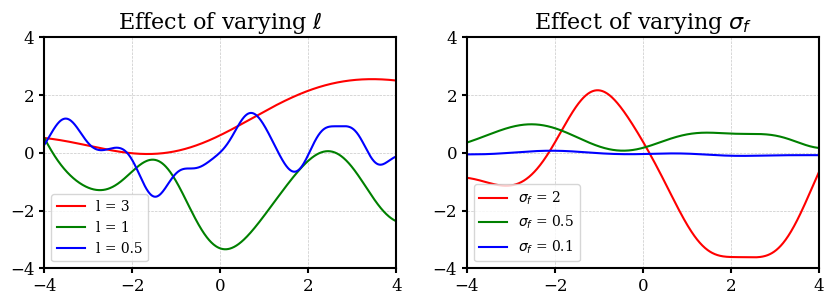

In [192]:
# we now enter a massive figure 
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].plot(RBFL2['x_values'], RBFL2['samples'][0], label = 'l = 3', color = 'red')
axes[0].plot(RBFL1['x_values'], RBFL1['samples'][0], label = 'l = 1', color = 'green')
axes[0].plot(RBFL3['x_values'], RBFL3['samples'][0], label = 'l = 0.5', color = 'blue')
axes[0].legend(loc  = 'lower left')
axes[0].set_xlim(-4,4)
axes[0].set_ylim(-4,4)
axes[0].set_title(r'Effect of varying $\ell$')

axes[1].plot(RBFS1['x_values'], RBFS1['samples'][0], label = r'$\sigma_f$ = 2', color = 'red')
axes[1].plot(RBFS2['x_values'], RBFS2['samples'][0], label = r'$\sigma_f$ = 0.5', color = 'green')
axes[1].plot(RBFS3['x_values'], RBFS3['samples'][0], label = r'$\sigma_f$ = 0.1', color = 'blue')
axes[1].legend(loc  = 'lower left')
axes[1].set_xlim(-4,4)
axes[1].set_ylim(-4,4)
axes[1].set_title(r'Effect of varying $\sigma_f$');
fig.savefig('figs/priors.png')

## plot 2: updating priors with data

In [66]:
data_y = [0.3, -1, 1, 1.4, -1.8, 0.5]
data_x = [-4, 2, -1, -2.3, 0.2, 3]

In [ ]:
plt.scatter(data_x, data_y)
plt.xlim(-5, 5)
plt.ylim(-3, 3)

In [152]:
POSTERIOR1 = gp_tool.regressor(kernel = 'rbf', 
                                         area_values=True, 
                                         data_x=data_x[0:1], 
                                         data_y=data_y[0:1],
                                         length=2, 
                                         sigma=0.75, 
                                         noise=0) 
 
POSTERIOR2 = gp_tool.regressor(kernel = 'rbf', 
                                         area_values=True, 
                                         data_x=data_x[0:3], 
                                         data_y=data_y[0:3],
                                         length=2, 
                                         sigma=1, 
                                         noise=0)  
POSTERIOR3 = gp_tool.regressor(kernel = 'rbf', 
                                         area_values=True, 
                                         data_x=data_x, 
                                         data_y=data_y,
                                         length=2, 
                                         sigma=1, 
                                         noise=0)  


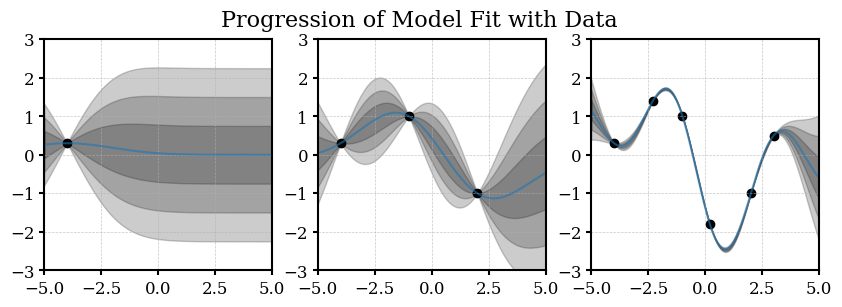

In [191]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
fig.suptitle("Progression of Model Fit with Data", fontsize=16)

axes[0].plot(POSTERIOR1['x_values'], POSTERIOR1['updated_mean'], alpha = 0.6)
axes[0].scatter(POSTERIOR1['input_x_data'], POSTERIOR1['input_y_data'], color = 'black')
axes[0].fill_between(POSTERIOR1['x_values'], 
                        POSTERIOR1['updated_mean'] - POSTERIOR1['updated_std'], 
                        POSTERIOR1['updated_mean'] + POSTERIOR1['updated_std'], 
                        color="black", alpha=0.2, label="1σ")
axes[0].fill_between(POSTERIOR1['x_values'], 
                        POSTERIOR1['updated_mean'] - 2*POSTERIOR1['updated_std'], 
                        POSTERIOR1['updated_mean'] + 2*POSTERIOR1['updated_std'], 
                        color="black", alpha=0.2, label="2σ")
axes[0].fill_between(POSTERIOR1['x_values'], 
                        POSTERIOR1['updated_mean'] - 3*POSTERIOR1['updated_std'], 
                        POSTERIOR1['updated_mean'] + 3*POSTERIOR1['updated_std'], 
                        color="black", alpha=0.2, label="3σ")
# axes[0].set_title('Sinusoidal data generation posteriors')
axes[0].set_ylim(-3, 3)
axes[0].set_xlim(-5, 5)


axes[1].plot(POSTERIOR2['x_values'], POSTERIOR2['updated_mean'], alpha = 0.6)
axes[1].scatter(POSTERIOR2['input_x_data'], POSTERIOR2['input_y_data'], color = 'black')
axes[1].fill_between(POSTERIOR2['x_values'], 
                        POSTERIOR2['updated_mean'] - POSTERIOR2['updated_std'], 
                        POSTERIOR2['updated_mean'] + POSTERIOR2['updated_std'], 
                        color="black", alpha=0.2, label="1σ")
axes[1].fill_between(POSTERIOR2['x_values'], 
                        POSTERIOR2['updated_mean'] - 2*POSTERIOR2['updated_std'], 
                        POSTERIOR2['updated_mean'] + 2*POSTERIOR2['updated_std'], 
                        color="black", alpha=0.2, label="2σ")
axes[1].fill_between(POSTERIOR2['x_values'], 
                        POSTERIOR2['updated_mean'] - 3*POSTERIOR2['updated_std'], 
                        POSTERIOR2['updated_mean'] + 3*POSTERIOR2['updated_std'], 
                        color="black", alpha=0.2, label="3σ")
# axes[1].set_title('Sinusoidal data generation posteriors')
axes[1].set_ylim(-3, 3)
axes[1].set_xlim(-5, 5)


axes[2].plot(POSTERIOR3['x_values'], POSTERIOR3['updated_mean'], alpha = 0.6)
axes[2].scatter(POSTERIOR3['input_x_data'], POSTERIOR3['input_y_data'], color = 'black')
axes[2].fill_between(POSTERIOR3['x_values'], 
                        POSTERIOR3['updated_mean'] - POSTERIOR3['updated_std'], 
                        POSTERIOR3['updated_mean'] + POSTERIOR3['updated_std'], 
                        color="black", alpha=0.2, label="1σ")
axes[2].fill_between(POSTERIOR3['x_values'], 
                        POSTERIOR3['updated_mean'] - 2*POSTERIOR3['updated_std'], 
                        POSTERIOR3['updated_mean'] + 2*POSTERIOR3['updated_std'], 
                        color="black", alpha=0.2, label="2σ")
axes[2].fill_between(POSTERIOR3['x_values'], 
                        POSTERIOR3['updated_mean'] - 3*POSTERIOR3['updated_std'], 
                        POSTERIOR3['updated_mean'] + 3*POSTERIOR3['updated_std'], 
                        color="black", alpha=0.2, label="3σ")
# axes[2].set_title('Sinusoidal data generation posteriors')
axes[2].set_ylim(-3, 3)
axes[2].set_xlim(-5, 5);
fig.savefig('figs/model_fit_with_data.png')

## plots 3,4,5: Cross section plots 

In [154]:
import sys
sys.path.append('..')

In [155]:
from plotting_tools.plotter import plotter, cross_section_plotter
from physics_informed_vector_fields.current_carrying_wire import field_around_current_carrying_wire
from physics_informed_vector_fields.current_carrying_coil import field_around_current_carrying_coil
from physics_informed_vector_fields.magnetic_dipole import field_around_magnetic_diplole

In [186]:
def cross_section_plotter(inputs, plane='z', title='Cross-Section of Vector Field', figname = 'fig'):
    """
    Plot a 2D cross section of a 3D vector field at the layer closest to coordinate=0 
    in the chosen plane ('x', 'y', or 'z'). The chosen plane's coordinate is ignored 
    in the 2D plot, and only the other two components are shown (as unit vectors).

    Parameters
    ----------
    x, y, z : ndarray of shape (Nx, Ny, Nz)
        Coordinate grids (e.g., created by np.meshgrid).
    u, v, w : ndarray of shape (Nx, Ny, Nz)
        Vector field components at each (x, y, z).
    plane : str, optional
        Which plane to take the cross-section of ('x', 'y', or 'z'). 
        Defaults to 'z'.
    title : str, optional
        Plot title. Defaults to 'Cross-Section of Vector Field'.
    """
    x, y, z, u, v, w = inputs[0], inputs[1], inputs[2], inputs[3], inputs[4], inputs[5] 

    # Validate the plane argument
    if plane not in ('x', 'y', 'z'):
        raise ValueError("plane must be one of 'x', 'y', or 'z'.")

    # helper to pick out the slice index closest to zero
    def find_slice_index(coord_grid):
        """
        Given a grid like x[:,:,k], returns the index k 
        such that coord_grid[..., k] is closest to zero.
        """
        # We expect something like x.shape = (Nx, Ny, Nz).
        # For a plane='z', we want z[0, 0, k] to pick out the z-values along the 3rd dimension, etc.
        # Here we assume that along the dimension of interest, the other two dims can index [0].
        # The shape might differ if meshgrid was done with different indexing orders,
        # but commonly x[0,0,:] etc. should give the 1D array of that dimension.
        # If that assumption doesn't hold, you can adapt as needed.
        one_dim_array = coord_grid.take(0, axis=0).take(0, axis=0)
        # one_dim_array is now something like z[0,0,:], a 1D array along the last dimension
        idx = np.argmin(np.abs(one_dim_array))
        return idx

    # Slice and compute for each plane
    if plane == 'z':
        # Find index k closest to z=0
        k_idx = find_slice_index(z)
        
        # 2D slices
        x2d = x[:, :, k_idx]
        y2d = y[:, :, k_idx]
        
        # For vectors, ignore w and only keep (u, v)
        u2d = u[:, :, k_idx]
        v2d = v[:, :, k_idx]
        
        # Normalize each (u2d, v2d) to be unit vectors
        mag = np.sqrt(u2d**2 + v2d**2)
        # To avoid dividing by 0, add a small epsilon
        mag[mag == 0] = 1e-15
        uhat = u2d / mag
        vhat = v2d / mag
        
        # Title annotation
        slice_value = z[0, 0, k_idx]  # approximate z-value
        plot_title = f"{title}"
        
        # Make a quiver plot
        plt.figure(figsize=(4,3))
        plt.quiver(x2d, y2d, uhat, vhat)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(plot_title)
        plt.axis("equal")
        plt.savefig('figs/' + figname, bbox_inches='tight')
        plt.show()
        
    elif plane == 'x':
        # Find index i closest to x=0
        # We can use x[i,0,0] along the i dimension
        def find_x_index(xx):
            # pick out x[:, 0, 0]
            one_dim_array = xx[:, 0, 0]
            idx = np.argmin(np.abs(one_dim_array))
            return idx
        i_idx = find_x_index(x)
        
        # 2D slices in the y-z plane
        y2d = y[i_idx, :, :]
        z2d = z[i_idx, :, :]
        
        # For vectors, ignore u and only keep (v, w)
        v2d = v[i_idx, :, :]
        w2d = w[i_idx, :, :]
        
        # Normalize each (v2d, w2d)
        mag = np.sqrt(v2d**2 + w2d**2)
        mag[mag == 0] = 1e-15
        vhat = v2d / mag
        what = w2d / mag
        
        # Title
        slice_value = x[i_idx, 0, 0]
        plot_title = f"{title}"
        
        # Quiver plot
        plt.figure(figsize=(4,3))
        plt.quiver(y2d, z2d, vhat, what)
        plt.xlabel("y")
        plt.ylabel("z")
        plt.title(plot_title)
        plt.axis("equal")
        plt.savefig('figs/' + figname, bbox_inches='tight')
        plt.show()
        
    else:  # plane == 'y'
        # Find index j closest to y=0
        # We can use y[0, j, 0] along the j dimension
        def find_y_index(yy):
            one_dim_array = yy[0, :, 0]
            idx = np.argmin(np.abs(one_dim_array))
            return idx
        j_idx = find_y_index(y)
        
        # 2D slices in the x-z plane
        x2d = x[:, j_idx, :]
        z2d = z[:, j_idx, :]
        
        # For vectors, ignore v and only keep (u, w)
        u2d = u[:, j_idx, :]
        w2d = w[:, j_idx, :]
        
        # Normalize each (u2d, w2d)
        mag = np.sqrt(u2d**2 + w2d**2)
        mag[mag == 0] = 1e-15
        uhat = u2d / mag
        what = w2d / mag
        
        # Title
        slice_value = y[0, j_idx, 0]
        plot_title = f"{title}"
        
        # Quiver plot
        plt.figure(figsize=(4,3))
        plt.quiver(x2d, z2d, uhat, what)
        plt.xlabel("x")
        plt.ylabel("z")
        plt.title(plot_title)
        plt.axis("equal")
        plt.savefig('figs/' + figname, bbox_inches='tight')
        plt.show()

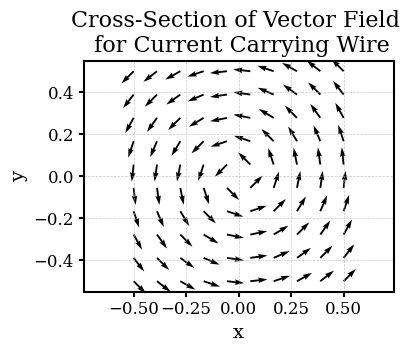

In [188]:
outputs_wire = field_around_current_carrying_wire(1000000)
cross_section_plotter(outputs_wire, 
                      plane = 'z',
                      title='Cross-Section of Vector Field \n for Current Carrying Wire', 
                      figname = 'wire_field_crosssection')

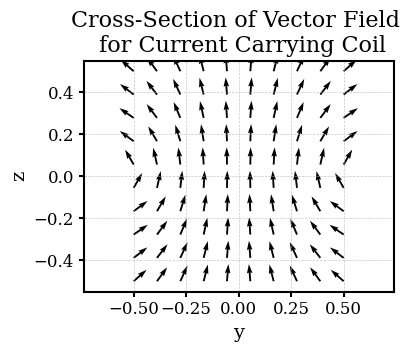

In [189]:
outputs_coil = field_around_current_carrying_coil(1000000)
cross_section_plotter(outputs_coil, 
                      plane='x',
                      title='Cross-Section of Vector Field \n for Current Carrying Coil', 
                      figname = 'coil_field_crosssection')

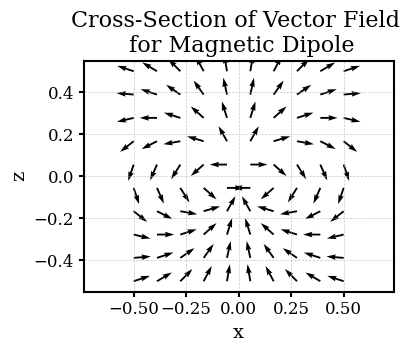

In [190]:
outputs_dipole = field_around_magnetic_diplole(1000000)
cross_section_plotter(outputs_dipole, 
                      plane='y', 
                      title='Cross-Section of Vector Field \n for Magnetic Dipole', 
                      figname = 'dipole_field_crosssection')